Theoretical <x>: (1-1j)
Simulated <x>: (1.004949374067099-1.0101215704648256j)
Absolute error for <x>: 0.011266875890436638


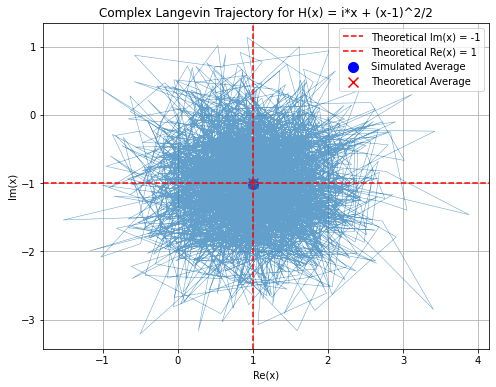

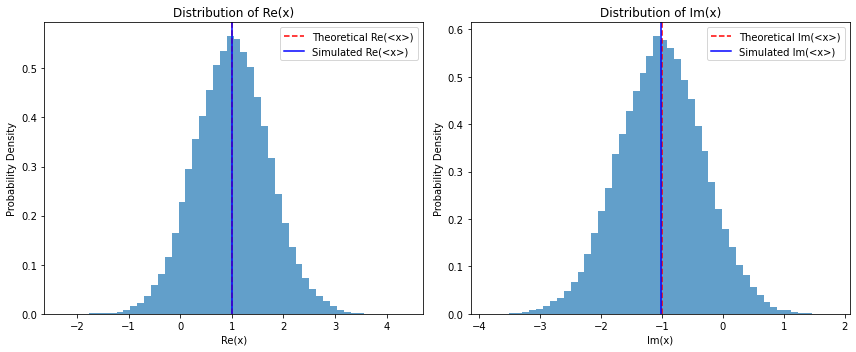

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def complex_langevin_simulation(num_steps, dt, gamma, initial_x):
    """
    Performs a complex Langevin simulation for a given Hamiltonian.
    """
    x = np.zeros(num_steps, dtype=complex)
    x[0] = initial_x
    
    def H(z):
        return 1j * z + (z-1)**2 / 2

    def F(z):
        return -(1j + z-1)

    noise_strength = np.sqrt(2 * gamma * dt) 

    for t in range(num_steps - 1):
        dW = (np.random.normal() + 1j * np.random.normal()) / np.sqrt(2) 
        x[t+1] = x[t] + dt * F(x[t]) + noise_strength * dW

    return x

# Simulation parameters
num_steps = 200000  # Increased steps for better statistics
dt = 0.01
gamma = 1.0  # Friction coefficient
initial_x = 0.0 + 0.0j 

# Run the simulation
trajectory = complex_langevin_simulation(num_steps, dt, gamma, initial_x)

# --- Comparison with Theoretical Values ---

# 1. Calculate theoretical expectation value of x
theoretical_x_avg = 1 - 1j
print(f"Theoretical <x>: {theoretical_x_avg}")

# 2. Calculate simulated expectation value of x
# Discard initial thermalization steps if necessary (e.g., first 10%)
thermalization_steps = int(0.1 * num_steps)
simulated_x_avg = np.mean(trajectory[thermalization_steps:])
print(f"Simulated <x>: {simulated_x_avg}")

# 3. Calculate the error
error_x = np.abs(simulated_x_avg - theoretical_x_avg)
print(f"Absolute error for <x>: {error_x}")

# 4. (Optional) Plot the trajectory and distributions as before
plt.figure(figsize=(8, 6))
plt.plot(np.real(trajectory[::100]), np.imag(trajectory[::100]), alpha=0.7, linewidth=0.5) # Plot fewer points for speed
plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.title("Complex Langevin Trajectory for H(x) = i*x + (x-1)^2/2")
plt.axhline(y=-1.0, color='r', linestyle='--', label='Theoretical Im(x) = -1')
plt.axvline(x=1.0, color='r', linestyle='--', label='Theoretical Re(x) = 1')
plt.scatter(np.real(simulated_x_avg), np.imag(simulated_x_avg), color='blue', marker='o', s=100, label='Simulated Average')
plt.scatter(np.real(theoretical_x_avg), np.imag(theoretical_x_avg), color='red', marker='x', s=100, label='Theoretical Average')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(np.real(trajectory[thermalization_steps:]), bins=50, density=True, alpha=0.7)
plt.axvline(np.real(theoretical_x_avg), color='r', linestyle='--', label='Theoretical Re(<x>)')
plt.axvline(np.real(simulated_x_avg), color='b', linestyle='-', label='Simulated Re(<x>)')
plt.xlabel("Re(x)")
plt.ylabel("Probability Density")
plt.title("Distribution of Re(x)")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(np.imag(trajectory[thermalization_steps:]), bins=50, density=True, alpha=0.7)
plt.axvline(np.imag(theoretical_x_avg), color='r', linestyle='--', label='Theoretical Im(<x>)')
plt.axvline(np.imag(simulated_x_avg), color='b', linestyle='-', label='Simulated Im(<x>)')
plt.xlabel("Im(x)")
plt.ylabel("Probability Density")
plt.title("Distribution of Im(x)")
plt.legend()
plt.tight_layout()
plt.show()